In [1]:
import sqlite3 as sql
import pandas

In [2]:
# connect to database
conn = sql.connect('NF_player_data.db')

In [3]:
# list table names
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_list = cursor.fetchall()

In [4]:
# Exclude firepower data tables
tables = []
for i in table_list:
    for j in i:
        if j.find('NF_player') != -1:
            tables.append(j)

In [5]:
# Player win_rate changes over time
def growth(player_id):
    base_line = "select win_rate, activity from NF_player_07072021 where id = '{}'".format(player_id)
    df = pandas.read_sql(base_line, conn)
    for i in range(1,len(tables)):
        add_line = "select win_rate, activity from {} where id = '{}'".format(tables[i], player_id)
        df_new = pandas.read_sql(add_line, conn)
        df = pandas.concat([df, df_new])
        df['activity'] = pandas.to_datetime(df['activity'])
    y_low = list(df['win_rate'])[-1] - 0.0025
    y_high = list(df['win_rate'])[-1] + 0.0025
    title_text = "Historical win rate of player: " + player_id
    df.plot('activity', 'win_rate', title = title_text, ylim=(y_low, y_high), xlabel = "")

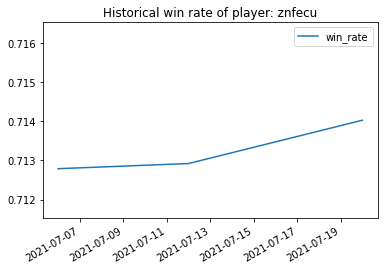

In [6]:
# 老树最近常穿的马甲
growth('znfecu')

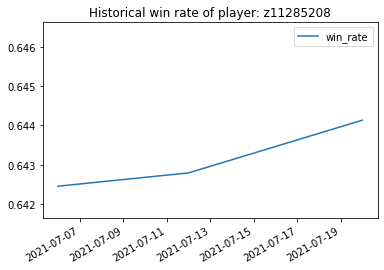

In [7]:
# 蹲在坑里不出来还打不中飞机的狗群主二条
growth('z11285208')

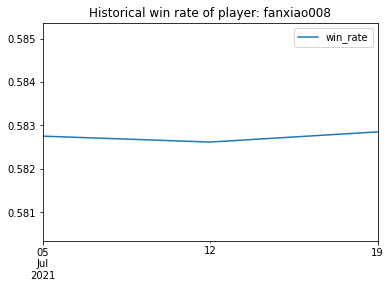

In [8]:
# 比英国都能起雾的青岛大虾
growth('fanxiao008')

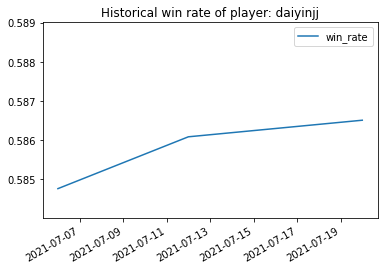

In [9]:
# 声音最大的烟雾报警器打印机
growth('daiyinjj')

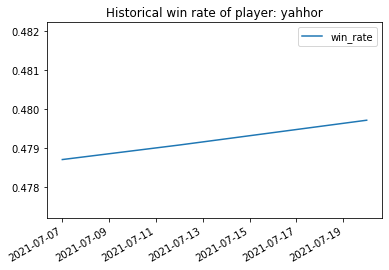

In [10]:
# 飞机永远不会准点的山猪
growth('yahhor')

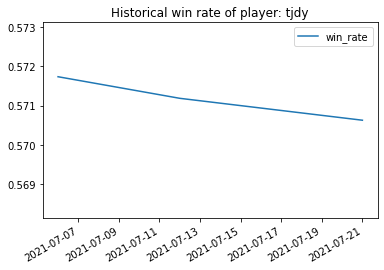

In [11]:
# 低调的乾坤组长老刀
growth('tjdy')

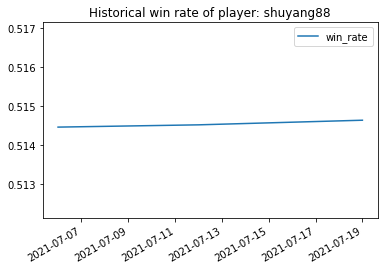

In [12]:
# 比葛优还能躺的笨笨
growth('shuyang88')

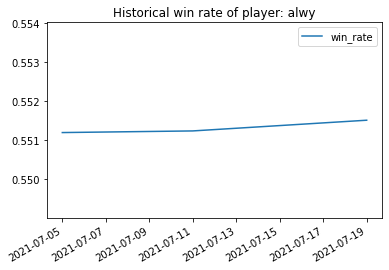

In [13]:
# 动不动就把自己喝进医院的弱鸡阿丽
growth('alwy')

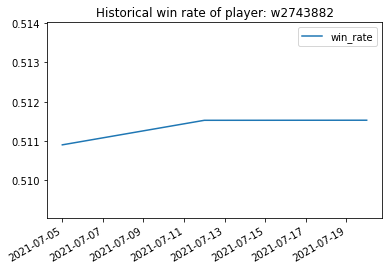

In [14]:
# 急诊室出勤率最高的掏粪专家
growth('w2743882')

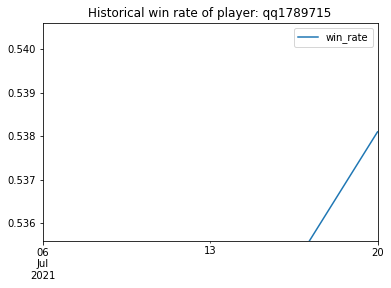

In [15]:
# 据说最近在思考还要不要炸老树的风风
growth('qq1789715')

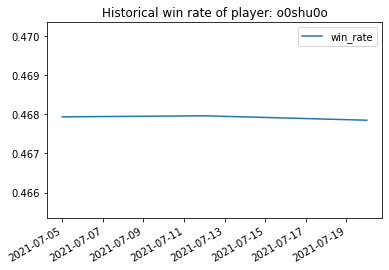

In [16]:
# 三天两头吹老树的奔奔
growth('o0shu0o')

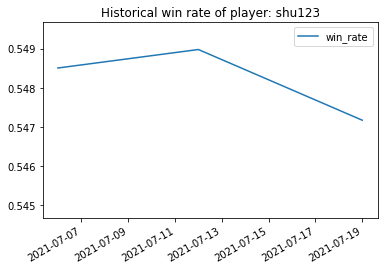

In [17]:
# 被财主眷顾的深海钢盔英国号
growth('shu123')

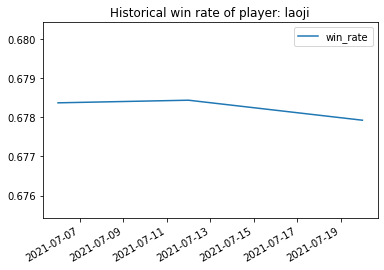

In [18]:
# 常年在超级开闪电能力的大船的老纪
growth('laoji')

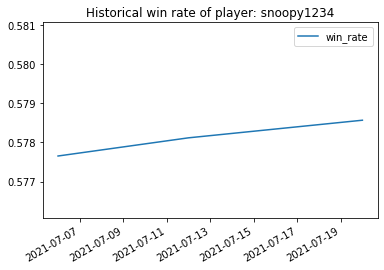

In [19]:
# 把面包做得像玩具的右手
growth('snoopy1234')

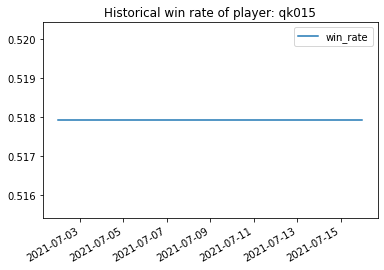

In [20]:
# 暴躁的干饭人
growth('qk015')

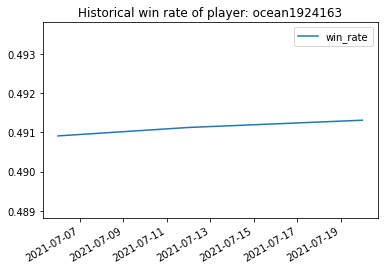

In [21]:
# 其实打飞机挺厉害的海洋之心
growth('ocean1924163')

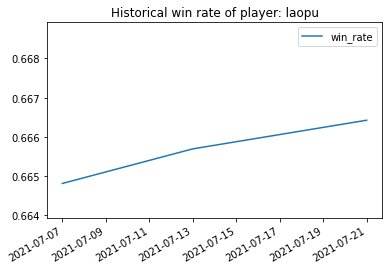

In [22]:
# 骂人比对线手速都快的拔线帝老仆
growth('laopu')

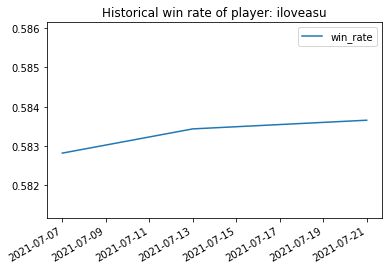

In [23]:
# 拥有自己改装武器库的韭菜
growth('iloveasu')